In [55]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [57]:
df.shape

(11251, 15)

In [58]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Exploratory Data Analysis

In [60]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### Gender

In [61]:
df.drop(['unnamed1', 'Status'], axis=1,inplace=True)

In [62]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [63]:
df.dropna(axis=0,inplace=True)

In [64]:
df.shape

(11239, 13)

In [65]:
res=df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)
res

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64

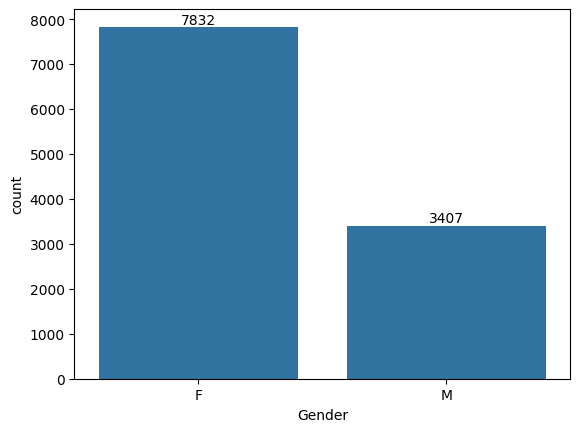

In [66]:
df = df
ax=sns.countplot(x ='Gender', data = df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

In [67]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [68]:
df.groupby(['Gender', 'Age Group'])['Amount'].sum().sort_values(ascending=False)

Gender  Age Group
F       26-35        30963954.94
        36-45        15509957.49
        18-25        11887003.00
M       26-35        11649489.00
F       46-50         6743393.00
M       36-45         6635038.00
F       51-55         5385208.00
M       18-25         5353729.00
        51-55         2876269.00
        46-50         2464451.00
F       55+           2404931.00
M       55+           1676056.00
F       0-17          1441409.00
M       0-17          1258244.00
Name: Amount, dtype: float64

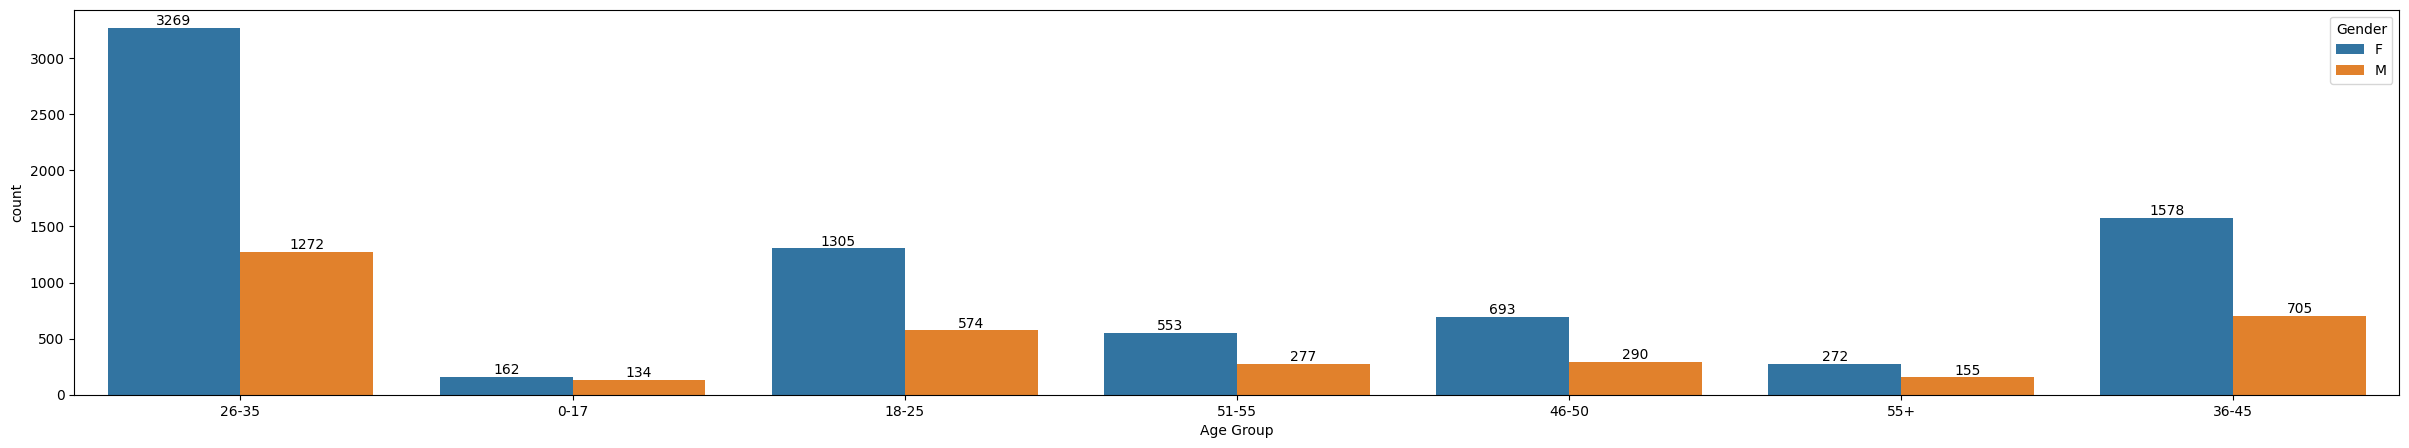

In [69]:
df = df
plt.figure(figsize=(30,5))
# ax = sns.barplot(x='Age Group', y='Amount', data=df, estimator=sum, ci=None,hue='Gender')
ax=sns.countplot(x ='Age Group', data = df,hue="Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [70]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [71]:
df1=df.groupby(['Orders','State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20484\3579277376.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='State', y='Amount', data=df1, estimator=sum, ci=None)


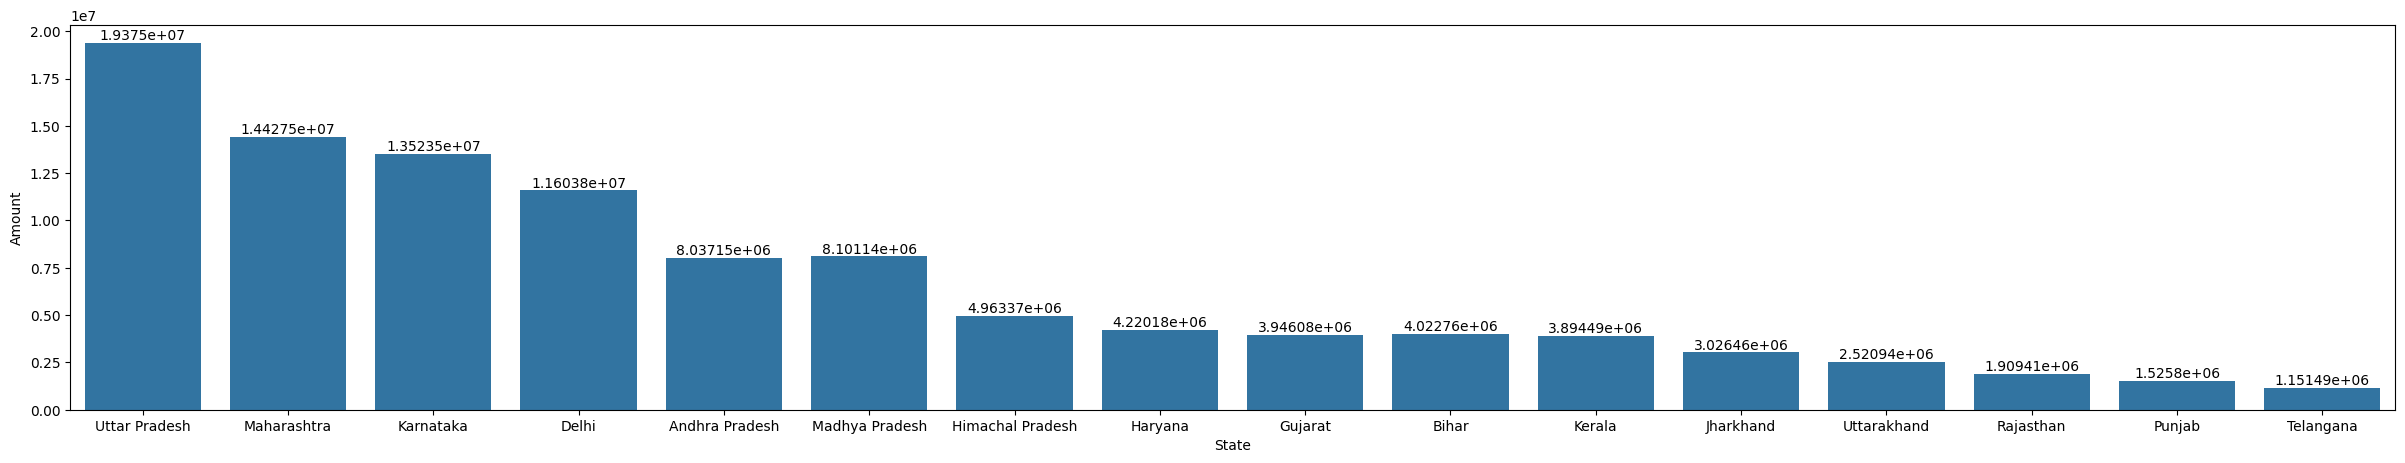

In [72]:

plt.figure(figsize=(30,5))
ax = sns.barplot(x='State', y='Amount', data=df1, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20484\3935458045.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='State', y='Amount', data=df1, estimator=sum, ci=None)


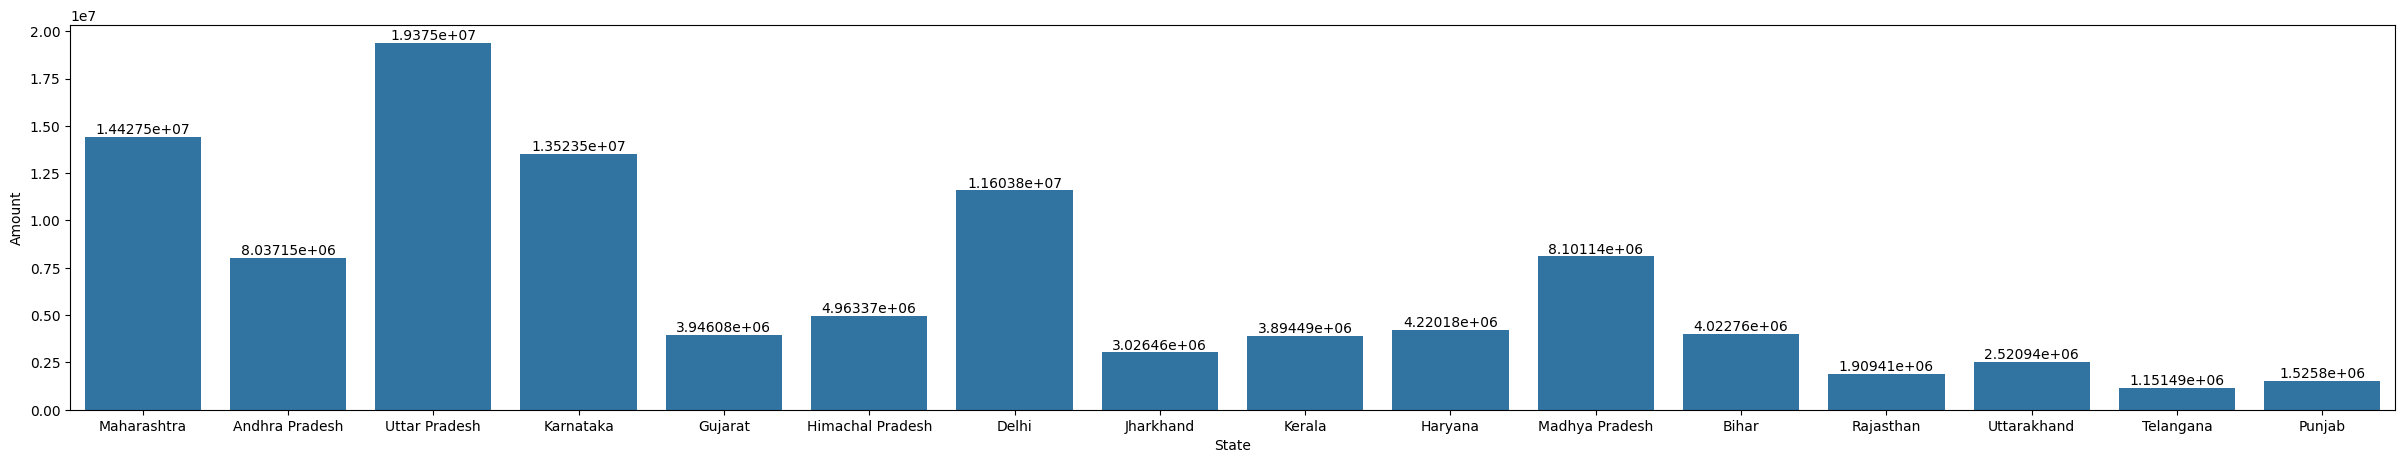

In [73]:
df1 = df
plt.figure(figsize=(30,5))
ax = sns.barplot(x='State', y='Amount', data=df1, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [74]:
df.groupby(['Gender','Marital_Status'])['Amount'].sum().sort_values(ascending=False)

Gender  Marital_Status
F       0                 43786648.44
        1                 30549207.99
M       0                 18338738.00
        1                 13574538.00
Name: Amount, dtype: float64

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20484\218954680.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Marital_Status', y='Amount', data=df, estimator=sum, ci=None,hue='Marital_Status')


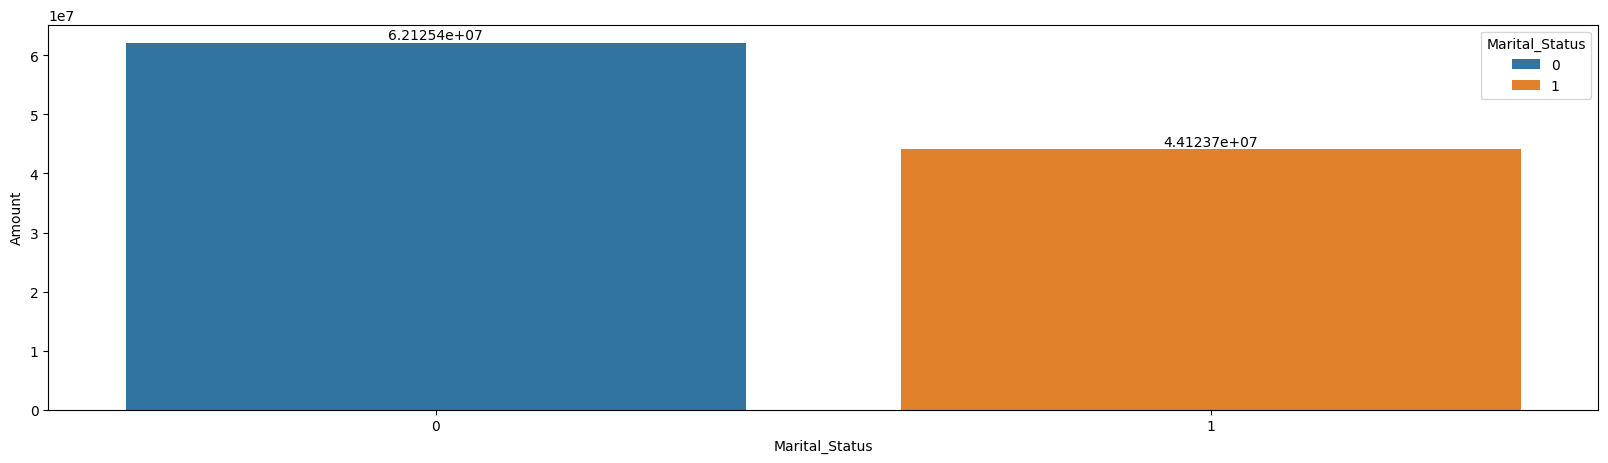

In [75]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='Marital_Status', y='Amount', data=df, estimator=sum, ci=None,hue='Marital_Status')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [76]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [77]:
df.groupby(['Occupation'])['Orders'].sum().sort_values(ascending=False)

Occupation
IT Sector          3997
Healthcare         3455
Aviation           3215
Banking            2817
Govt               2155
Hospitality        1739
Media              1596
Automobile         1371
Lawyer             1344
Chemical           1309
Retail             1270
Food Processing    1073
Construction       1025
Textile             893
Agriculture         722
Name: Orders, dtype: int64

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20484\1579729501.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Occupation', y='Orders', data=df, estimator=sum, ci=None)


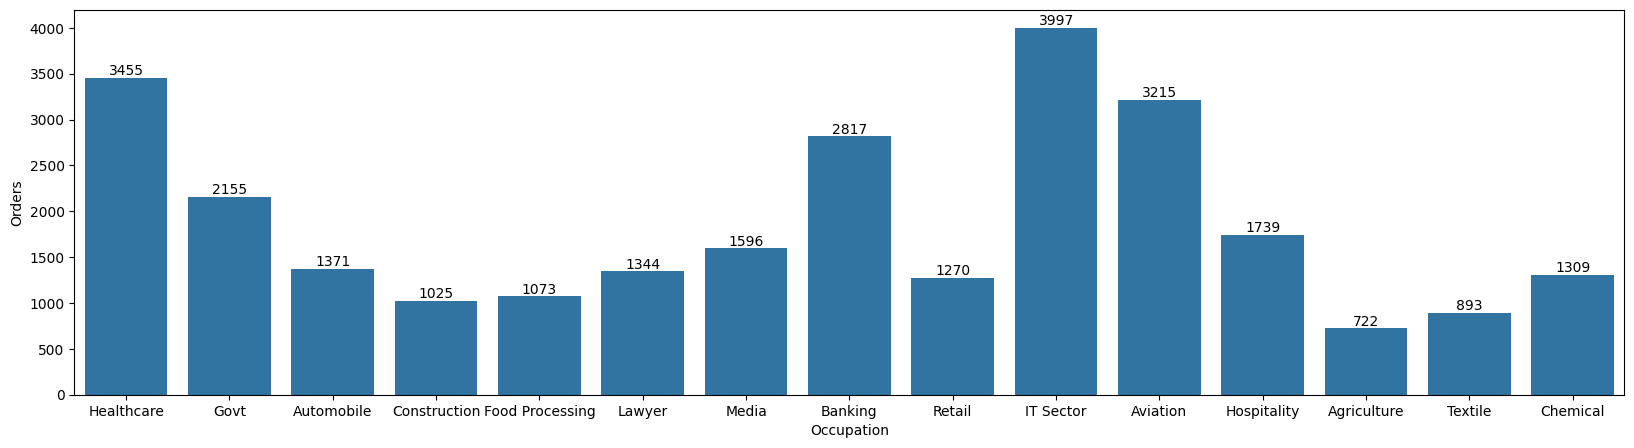

In [78]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='Occupation', y='Orders', data=df, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Product Category

In [79]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [80]:
df.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending=False)

Product_Category
Food                     33933883.50
Clothing & Apparel       16495019.00
Electronics & Gadgets    15643846.00
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Games & Toys              4331694.00
Sports Products           3635933.00
Beauty                    1959484.00
Auto                      1958609.99
Stationery                1676051.50
Household items           1569337.00
Tupperware                1155642.00
Books                     1061478.00
Decor                      730360.00
Pet Care                   482277.00
Hand & Power Tools         405618.00
Veterinary                 112702.00
Office                      81936.00
Name: Amount, dtype: float64

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

## Conclusion:

### 

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20484\361088675.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Product_Category', y='Amount', data=df, estimator=sum, ci=None)


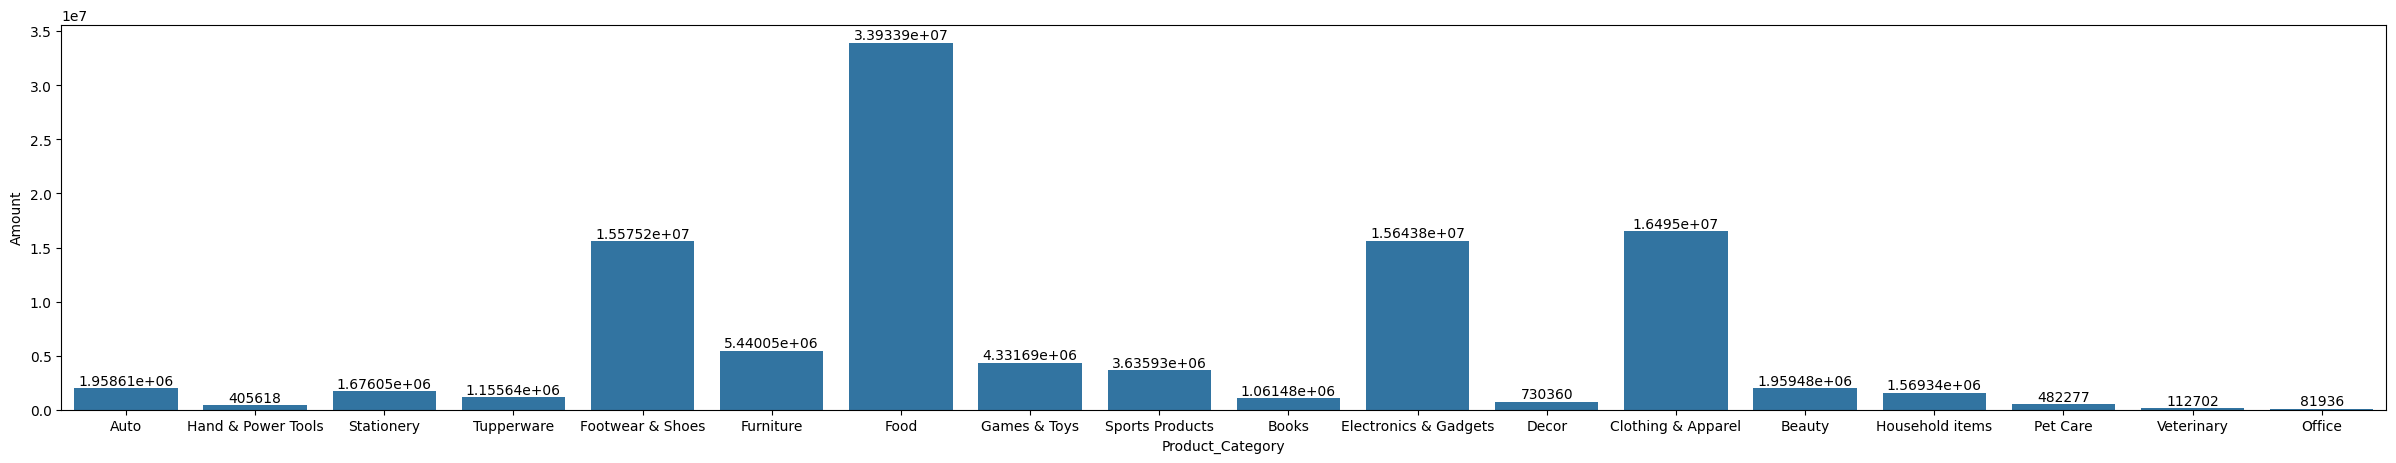

In [81]:
plt.figure(figsize=(30,5))
ax = sns.barplot(x='Product_Category', y='Amount', data=df, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.show()

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

complete project on YouTube: https://www.youtube.com/@RishabhMishraOfficial
    
complete project on GitHub: https://github.com/rishabhnmishra/Python_Diwali_Sales_Analysis

Thank you!